# Analyzing Stephen King's Novels and Movies

In [69]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

sk_movies = pd.read_csv('csvs/stephen_king_movies.csv')
sk_books = pd.read_csv('csvs/stephen_king_books.csv')

Let's filter the data and merge the books and movies based off of the books into one dataframe. I'm also going to scale the GoodReads ratings and RottenTomatoes audience ratings by 2 to keep them on a 0-10 scale.

In [70]:
sk_movies_filtered = sk_movies[(sk_movies['based_on'].isin(sk_books.title)) & (sk_movies['type'] != 's') & (sk_movies['year'] != '2017')]
sk_m_and_b = pd.merge(sk_movies_filtered, sk_books, left_on='based_on', right_on='title')

# Scale

sk_m_and_b[['gr_rating', 'rt_audience_rating']] *= 2

Now let's look at the data to find the means of each rating (IMDB, GoodReads, RottenTomatoes Audience and RottenTomatoes Critics).

In [87]:


gr_mean = np.mean(sk_m_and_b['gr_rating'])
rt_a_mean = np.mean(sk_m_and_b['rt_audience_rating'])
rt_c_mean = np.mean(sk_m_and_b['rt_critic_rating'])
imdb_mean = np.mean(sk_m_and_b['imdb_rating'])

print 'GoodReads Mean: {}'.format(gr_mean)
print 'IMDB Mean: {}'.format(imdb_mean)
print 'RottenTomatoes Audience Mean: {}'.format(rt_a_mean)
print 'RottenTomatoes Critic Mean: {}'.format(rt_c_mean)

gr_great = np.percentile(sk_m_and_b['gr_rating'], 75)
imdb_great = np.percentile(sk_m_and_b['imdb_rating'], 75)

print 'GoodReads 75th Percentile value: {}'.format(gr_great)
print 'IMDB 75th Percentile value: {}'.format(imdb_great)


GoodReads Mean: 7.65205882353
IMDB Mean: 5.59264705882
RottenTomatoes Audience Mean: 5.909375
RottenTomatoes Critic Mean: 5.01555555556
GoodReads 75th Percentile value: 7.82
IMDB 75th Percentile value: 6.6


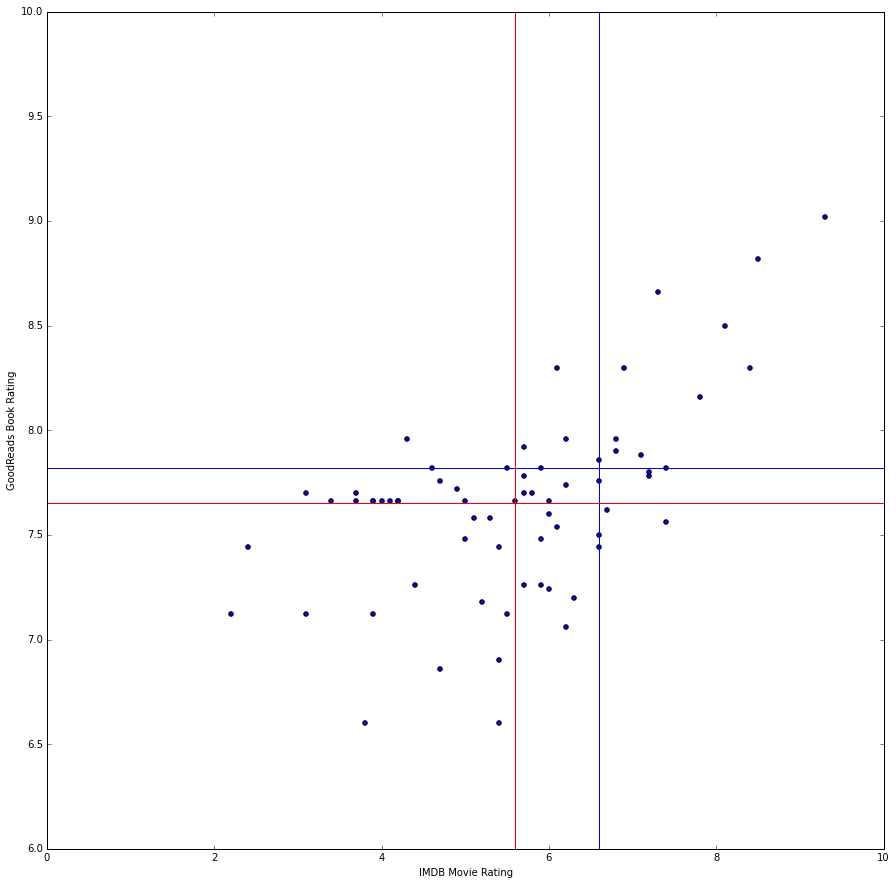

In [89]:
plt.figure(figsize=(15,15))
plt.xlabel('IMDB Movie Rating')
plt.ylabel('GoodReads Book Rating')
plt.xlim(0, 10)
plt.ylim(6, 10)
plt.axhline(y=gr_great)
plt.axvline(x=imdb_great)
plt.axhline(y=gr_mean, color='r')
plt.axvline(x=imdb_mean, color='r')
#plt.ylim(0, 5)
plt.scatter(sk_m_and_b['imdb_rating'], sk_m_and_b['gr_rating'])
plt.show()

What the quadrants signify:

Blue:
Top Right - Great movies, Great books
Bottom Right - Great movies, Average/Bad books
Top Left - Average/Bad movies, Great books
Bottom Left- Average/Bad movies, Average/Bad books

Red:
Top Right - Above Average movies, Above Average books
Bottom Right - Above Average movies, Bad books
Top Left - Bad movies, Above Average books
Bottom Left- Bad movies, Bad books

The reviewers on GoodReads seem to be a bit more lenient with their rating system. A few possible reasons:

* There are also far less reviewers on GoodReads as there are on IMDB.
* Someone reading a short story, novella, or book is likely to be a fan of a certain author, so the reviewer might incorporate bias into the rating
* 
